### Лабораторная работа № 3 – Регрессионный анализ данных

Выполнил:Сергеев Алексей 18-ИВТ-3 

13 вариант

## 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1)id - уникальный идентификатор для каждого проданного дома

2)date - дата продажи дома

3)price - цена каждого проданного дома

4)bedrooms - Количество спален

5)bathrooms - Количество ванных комнат, где 5 приходится на комнату с туалетом но без душа

6)sqft_living - квадратные метры внутренней жилой площади квартир

7)sqft_lot - квадратные метры земельного участка

8)floors - количество этажей

9)waterfront - фиктивная переменная для того, выходила ли квартира на набережную или нет

10)view - индекс от 0 до 4 того, насколько хорошим был вид объекта недвижимости

11)condition - индекс от 1 до 5 по состоянию квартиры

12)grade - это показатель от 1 до 13, где 1-3 не дотягивают до уровня строительства и проектирования зданий, 7 имеют средний 
уровень строительства и проектирования, а 11-13 имеют высокий уровень качества строительства и проектирования.

13)sqft_above - квадратный метр внутреннего жилого пространства, находящегося над уровнем земли

14)sqft_basement - квадратный метраж внутреннего жилого пространства, находящегося ниже уровня земли

15)yr_built - год, когда дом был первоначально построен

16)yr_renovated - год последнего ремонта дома

17)zipcode - почтовый индекс дома

18)lat - широта

19)long - долгота

20)sqft_living15 - метраж внутренней жилой площади жилого помещения для ближайших 15 соседей

21)sqft_lot15 - квадратные метры земельных участков ближайших 15 соседей


## 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [1]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

In [2]:
kc_house = pd.read_csv("kc_house_data.csv")
kc_house= pd.DataFrame(kc_house)
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print("До удаления дубликатов: %d" % len(kc_house))
kc_house.drop_duplicates(keep="first", inplace=True)
print("После удаления дубликатов: %d" % len(kc_house))

До удаления дубликатов: 21613
После удаления дубликатов: 21613


## 3)Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [4]:
kc_house1 = kc_house[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
kc_house1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


BoxPlot для признаков до масштабирования

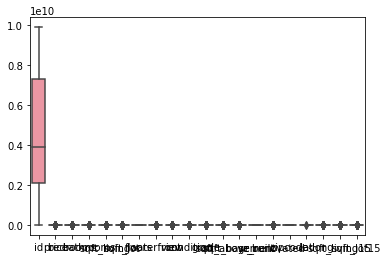

In [5]:
sn.boxplot(data= kc_house1)

BoxPlot для признаков после масштабирования

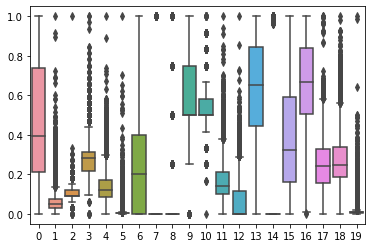

In [6]:
scaler = MinMaxScaler()
scaler.fit(kc_house1)
kc_house1 = scaler.transform(kc_house1)

sn.boxplot(data = kc_house1)

## 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [7]:
categorical = ['waterfront', 'view', 'condition', 'grade']
kc_house[categorical]

,waterfront,view,condition,grade
0,0,0,3,7
1,0,0,3,7
2,0,0,3,6
3,0,0,5,7
4,0,0,3,8
...,...,...,...,...
21608,0,0,3,8
21609,0,0,3,8
21610,0,0,3,7
21611,0,0,3,8


## 5)Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

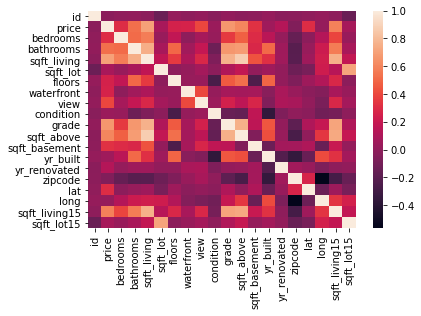

In [8]:
sn.heatmap(kc_house.corr())

## 6. Заполните пропущенные значения в данных

In [9]:
kc_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пропущенных данных нет

## 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

### 1)Линейная регресссия, LASSO регуляризатор

In [10]:
kc_house.drop(columns = 'date', inplace = True)

x_data, y_data = kc_house.drop(['price'],axis=1 ), kc_house['price']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 123)

In [11]:
warnings.filterwarnings('ignore')

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
lasso_reg = lasso.predict(X = x_test)

pearson, p_value_pearson = pearsonr(lasso_reg , y_test)
spearman, p_value_spearman = spearmanr(lasso_reg , y_test)

print('Coefficient of Pearson=', pearson)
print('Сoefficient of Spearman=', spearman)

if p_value_pearson < 0.05 and p_value_spearman < 0.05:
  print('p-value < 0,05')
else:
    print('p-value > -0,05')

Coefficient of Pearson= 0.8425463530328658
Сoefficient of Spearman= 0.8575611475081385
p-value < 0,05


### 2)Линейная регрессия, RIDGE регуляризатор

In [12]:
reg = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(x_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

reg = Ridge(alpha=best_alpha)
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)

pearson, p_value_pearson = pearsonr(pred_reg, y_test)
spearman, p_value_spearman = spearmanr(pred_reg, y_test)

print('Coefficient of Pearson=', pearson)
print('Сoefficient of Spearman=', spearman)

if p_value_pearson < 0.05 and p_value_spearman < 0.05:
    print('p-value < 0,05')
else:
    print('p-value > -0,05')

best alpha: 0.0
Coefficient of Pearson= 0.8425469634333027
Сoefficient of Spearman= 0.8576005299841342
p-value < 0,05
